# Handwriting Reader

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import pygame
from PIL import Image

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
'''
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.activations import relu,linear, softmax
'''

pygame 2.5.2 (SDL 2.28.3, Python 3.9.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


'\nfrom tensorflow.keras import layers\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, InputLayer\nfrom tensorflow.keras.activations import relu,linear, softmax\n'

In [79]:
#I figured out these locations once and then saved them
#Essentially this data is too much so I am finding the sections
#which correspond to each letter so I can grab certain chunks of the data to train
start_letter_locations = {0: 0, 1: 13869, 2: 22537, 3: 45946, 4: 56080, 5: 67520, 
                          6: 68683, 7: 74445, 8: 81663, 9: 82783, 10: 91276, 11: 96879, 
                          12: 108465, 13: 120801, 14: 139811, 15: 197636, 16: 216977, 
                          17: 222789, 18: 234355, 19: 282774, 20: 305269, 21: 334277, 
                          22: 338459, 23: 349243, 24: 355515, 25: 366374}

#df = pd.read_csv('Data\A_Z Handwritten Data.csv', skiprows=10000, nrows=10000)
path = 'Data\A_Z Handwritten Data.csv'

num_rows = 5000 #should be 5000

df = pd.read_csv(path, nrows=num_rows)

for i in range(1, 26):
    df_temp = pd.read_csv(path, skiprows=lambda x: x not in [0] and x < start_letter_locations[i], nrows=num_rows+1)
    #print(df_temp)
    df = pd.concat([df, df_temp], ignore_index=True)
    #df = df.append(df_temp, ignore_index=True)
    #pd.concat(objs, axis=0, join=’outer’, ignore_index=False, keys=None)

y = df['0']
X = df.drop('0', axis=1)
X = X / 255

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [80]:
y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [81]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(26, activation='linear'))
model.add(keras.layers.Softmax())

model.compile(optimizer=Adam(learning_rate=0.0001), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [82]:
hist = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


c:\Users\SamV\Documents\School\Senior Year\FINAL HANDWRITING\.venv\lib\site-packages\keras\src\backend\tensorflow\nn.py:625: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3249/3251 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5666 - loss: 1.6894

c:\Users\SamV\Documents\School\Senior Year\FINAL HANDWRITING\.venv\lib\site-packages\keras\src\backend\tensorflow\nn.py:625: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3251/3251 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.5668 - loss: 1.6888 - val_accuracy: 0.8418 - val_loss: 0.6027
Epoch 2/10
3251/3251 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8519 - loss: 0.5594 - val_accuracy: 0.8761 - val_loss: 0.4654
Epoch 3/10
3251/3251 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8833 - loss: 0.4400 - val_accuracy: 0.8976 - val_loss: 0.3840
Epoch 4/10
3251/3251 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9008 - loss: 0.3698 - val_accuracy: 0.9118 - val_loss: 0.3284
Epoch 5/10
3251/3251 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9178 - loss: 0.3107 - val_accuracy: 0.9218 - val_loss: 0.2899
Epoch 6/10
3251/3251 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9278 - loss: 0.2746 - val_accuracy: 0.9287 - val_loss: 0.2628
Epoch 7/10
3251/3251 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9343 - loss: 0.2461 - val_accuracy: 0.9336 - val_loss: 0.2429
Epoch 8/10
3251/3251 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9426 - loss: 0.2188 - val_

In [83]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Accuracy: {test_acc:.4f}')  # formatted to show 4 decimal places

813/813 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9452 - loss: 0.1989
Accuracy: 0.9460


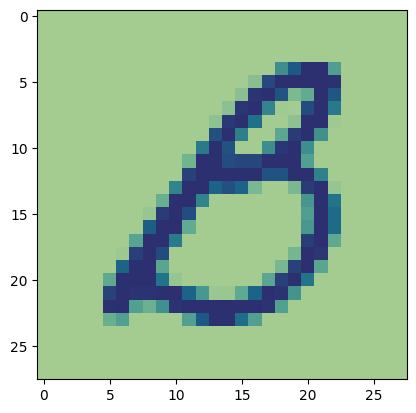

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Model Prediction:  B


In [104]:
letters = []
for i in range(65, 91):
    letter = chr(i)
    letters.append(letter)

random_index = 8000
plt.imshow(X.iloc[random_index].values.reshape(28, 28), cmap='crest')
plt.show()

prediction = model.predict(np.array([X.iloc[random_index].values]))
print('Model Prediction: ', letters[np.argmax(prediction)])

In [85]:
#This function just turns the users drawn image into the format which 
#is the same as that of the dataset which I trained on. 
def downsample(df, block_size):
    arr = df.to_numpy()

    new_height = arr.shape[0] // block_size
    new_width = arr.shape[1] // block_size

    new_arr = np.zeros((new_height, new_width), dtype=bool)
    count_arr = np.zeros((new_height, new_width), dtype=int)

    for i in range(new_height):
        for j in range(new_width):
            vertical_slice = slice(i * block_size, (i + 1) * block_size)
            horizontal_slice = slice(j * block_size, (j + 1) * block_size)

            block = arr[vertical_slice, horizontal_slice]

            new_arr[i, j] = np.any(block)
            count_arr[i, j] = np.sum(block)

    return (pd.DataFrame(new_arr), pd.DataFrame(count_arr))


    '''
    lists = [[] for _ in range(28)]
    #df_lists = pd.DataFrame(np.nan, index=range(28), columns=range(28))

    for i in range(block_size):
        for j in range(block_size):
            all_vals = []
            for m in range(28):
                for n in range(28):
                    row = (i*28) + m
                    col = (j*28) + n
                    val = df.iloc[row, col]
                    all_vals.append(val)
            lists[i].append(all_vals)

    bool_list = pd.DataFrame(np.nan, index=range(28), columns=range(28))
    count_list = pd.DataFrame(np.nan, index=range(28), columns=range(28))

    for r in range(len(lists)):
        for c in range(len(lists[r])):
            count = sum(lists[r][c])
            if count > 0:
                bool_list.iloc[r, c] = True
            else:
                bool_list.iloc[r, c] = False
            count_list.iloc[r, c] = count

    return (bool_list, count_list)
    '''

In [86]:
#This just turns a dataframe in our usual formatting to an image
def df_to_image(df):
    array = df.to_numpy()
    #The next two lines came from chatGPT 3.5
    image_data = np.where(array, 0, 255).astype(np.uint8)
    img = Image.fromarray(image_data, 'L')  # 'L' mode for grayscale
    return img

In [129]:
#This function makes the final image for the model using the 
#number of filled in pixels, not only the true false value for 
#if a pixel is filled. This is an attempt at making user input formatted
#more similarly to the original dataset
def get_color_image_from_counts(df, df_counts):    
    initial_color_intensity = 255

    df_color = pd.DataFrame(index=df_counts.index, columns=df_counts.columns)

    # Loop over each cell in the DataFrame

    max = df_counts.max().max()

    df_color = df_counts.applymap(lambda x: (initial_color_intensity*(5/6)) + (initial_color_intensity/2)*(x/max) if x>0 else 0) / 255

    df_color_copy = df_color.copy()

    for intensity in range(1, 3):
        df_copy = df.copy()
        for r in range(len(df_copy)):
            for c, col_name in enumerate(df_copy.columns):
                if not df_copy.at[r, c]:
                    surrounding_list = []
                    for r_add in range(-1, 2):
                        for c_add in range(-1, 2):
                            if r+r_add != -1:
                                try:
                                    surrounding_list.append(df_color.iat[r+r_add, c+c_add])
                                except IndexError:
                                    pass
                    if any(surrounding_list):
                        nonzero_numbers = [num for num in surrounding_list if num != 0]
                        average_nonzero = sum(nonzero_numbers) / len(nonzero_numbers) if nonzero_numbers else 0
                        color = (average_nonzero * (0.4**intensity))
                        #color = (initial_color_intensity / (2**intensity))/255
                        df_color_copy.at[r, c] = color
                        df.at[r, c] = True
        df_color = df_color_copy
    return df_color

In [114]:
def get_color_image(df):

    initial_color_intensity = 255

    df_color = df.applymap(lambda x: initial_color_intensity if x else 0) / 255

    for intensity in range(2, 3):
        df_copy = df.copy()
        for r in range(len(df_copy)):
            for c, col_name in enumerate(df_copy.columns):
                if not df_copy.at[r, c]:
                    surrounding_list = []
                    for r_add in range(-1, 2):
                        for c_add in range(-1, 2):
                            if r+r_add != -1:
                                try:
                                    surrounding_list.append(df_copy.iat[r+r_add, c+c_add])
                                except IndexError:
                                    pass
                    if True in surrounding_list:
                        #color = (df_color.at[r, c] / (2**intensity))/255
                        color = (initial_color_intensity / (2**intensity))/255
                        df_color.at[r, c] = color
                        df.at[r, c] = True
    return df_color

C:\Users\SamV\AppData\Local\Temp\ipykernel_16608\3580960338.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_color = df_counts.applymap(lambda x: (initial_color_intensity*(5/6)) + (initial_color_intensity/2)*(x/max) if x>0 else 0) / 255


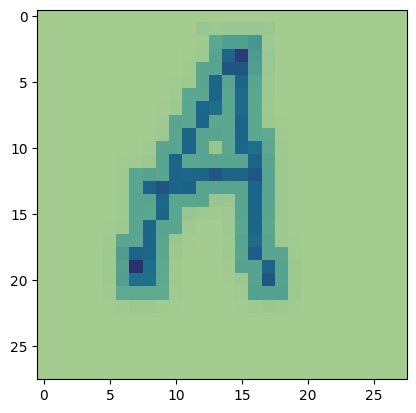

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Model Prediction:  A


In [130]:
pygame.init()

width, height = 28**2, 28**2  
background_color = (0, 0, 0)
draw_color = (255, 255, 255)
line_thickness = 2

#Set up the general window and stuff
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Draw Here!")
screen.fill(background_color)
clock = pygame.time.Clock()

drawing = False
running = True

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_RETURN:
                running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            drawing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            drawing = False
        elif event.type == pygame.MOUSEMOTION and drawing:
            pygame.draw.circle(screen, draw_color, event.pos, line_thickness)

    pygame.display.flip()
    clock.tick(60)

#Chat GPT 3.5 helped with the following 4 lines of code
buffer_string = pygame.image.tostring(screen, 'RGB')
image = pygame.image.fromstring(buffer_string, (width, height), 'RGB')
array = pygame.surfarray.array3d(image)

is_colored = np.any(array != np.array(background_color).reshape(1, 1, 3), axis=2)

df = pd.DataFrame(is_colored)
df_condensed, df_counts = downsample(df, 28)

df_condensed = df_condensed.T #Because it was formatting and shaping it wrong otherwise
df_condensed_final = df_condensed.copy()

df_counts = df_counts.T
df_counts_final = df_counts.copy()

### THIS IS PLACE TO CHANGE WHICH DRAWING METHOD IS USED:
df_color = get_color_image_from_counts(df_condensed_final, df_counts_final)
#df_color = get_color_image(df_condensed_final)

df_color = pd.DataFrame(df_color.values.flatten()).T
plt.imshow(df_color.iloc[0].values.reshape(28, 28), cmap='crest')

plt.show()

pred_v = model.predict(np.array([df_color.iloc[0].values]))


'''
for r in range(len(df_condensed)):
    for c, col_name in enumerate(df_condensed.columns):
        surrounding_list = []
        for r_add in range(-1, 2):
            for c_add in range(-1, 2):
                if r+r_add != -1:
                    try:
                        surrounding_list.append(df_condensed.iat[r+r_add, c+c_add])
                    except IndexError:
                        pass
        if True in surrounding_list:
            df_final.at[r, c] = True
'''

pygame.quit()

'''
single_row_bool = pd.DataFrame(df_final.values.flatten()).T
single_row_color = single_row_bool.applymap(lambda x: 255 if x else 0)
single_row_color = single_row_color / 255

#plt.imshow(single_row_color.iloc[0].values.reshape(28, 28), cmap='crest')

plt.imshow(df_color.iloc[0].values.reshape(28, 28), cmap='crest')


plt.show()

pred_v = model.predict(np.array([single_row_color.iloc[0].values]))
'''

print('Model Prediction: ', letters[np.argmax(pred_v)])